In [1]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

pandas.set_option("display.precision", 2)

%store -r WORKDIR

if 'WORKDIR' not in dir():
    WORKDIR = 'C:/Users/BZ241WX/Documents/InfNet/CursoPosDataScience/mit_data_science/'

input_table = WORKDIR + '/Data/Processed/winequality-red-proc.parquet'

variable_list = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides',
                 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol']

# Leitura dos dados

In [2]:
data = pandas.read_parquet(input_table)
print('data shape:', data.shape)
print('data columns:', data.columns.tolist())

data shape: (1279, 12)
data columns: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'good_quality']


# Distribuição dos dados

In [3]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1279.00,1279.00,1279.00,1279.00,1279.00,1279.0,1279.00,1.28e+03,1279.00,1279.00,1279.00
mean,8.31,0.53,0.27,2.55,0.09,15.8,46.87,9.97e-01,3.31,0.66,10.42
std,1.75,0.18,0.20,1.42,0.05,10.4,33.59,1.91e-03,0.16,0.17,1.07
min,4.60,0.12,0.00,0.90,0.01,1.0,6.00,9.90e-01,2.74,0.37,8.40
25%,7.10,0.39,0.09,1.90,0.07,7.0,22.00,9.96e-01,3.21,0.55,9.50
50%,7.90,0.52,0.25,2.20,0.08,14.0,38.00,9.97e-01,3.31,0.62,10.20
75%,9.20,0.64,0.42,2.60,0.09,21.0,64.00,9.98e-01,3.40,0.73,11.10
max,15.60,1.58,1.00,15.50,0.61,72.0,289.00,1.00e+00,4.01,2.00,14.00


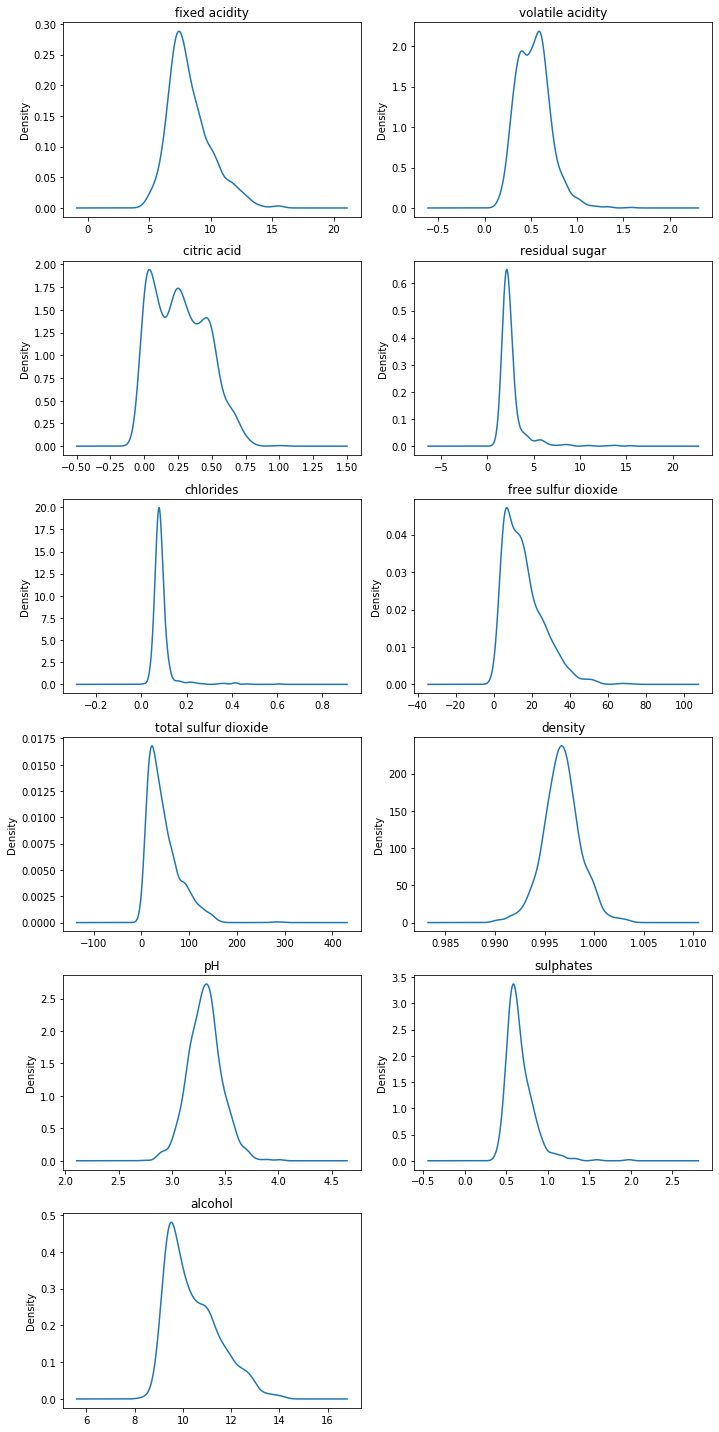

In [4]:
plt.figure(figsize=(10,20))
for i, cname in enumerate(variable_list):
    plt.subplot(int(len(variable_list)/2+0.5), 2, i+1)
    data[cname].plot.kde()
    plt.title(cname)
plt.tight_layout()

# Distribuição agrupada pela qualidade

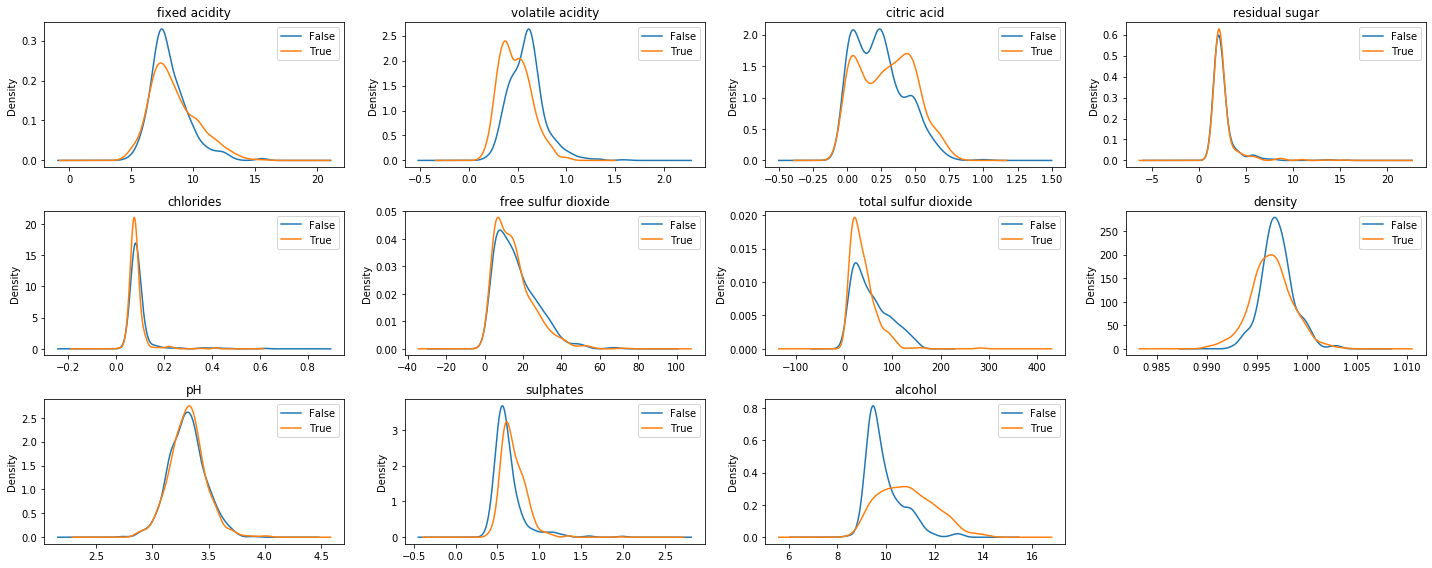

In [6]:
plt.figure(figsize=(20,8))
for i, cname in enumerate(variable_list):
    plt.subplot(int(len(variable_list)/4+0.5), 4, i+1)
    data.groupby('good_quality')[cname].plot.kde()
    plt.title(cname)
    plt.legend()
plt.tight_layout()

## Correlação com a variável alvo - qualidade

Text(0.5, 0, 'Correlation')

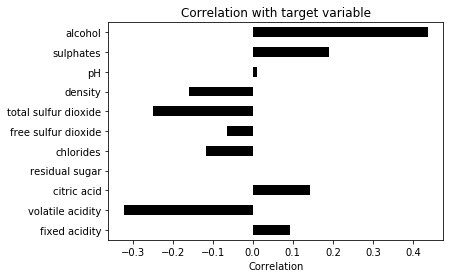

In [7]:
data.corr()['good_quality'].drop('good_quality').plot.barh(color='k')
plt.title('Correlation with target variable')
plt.xlabel('Correlation')

# Dispersão Pares Variáveis 

C:\Users\BZ241WX\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


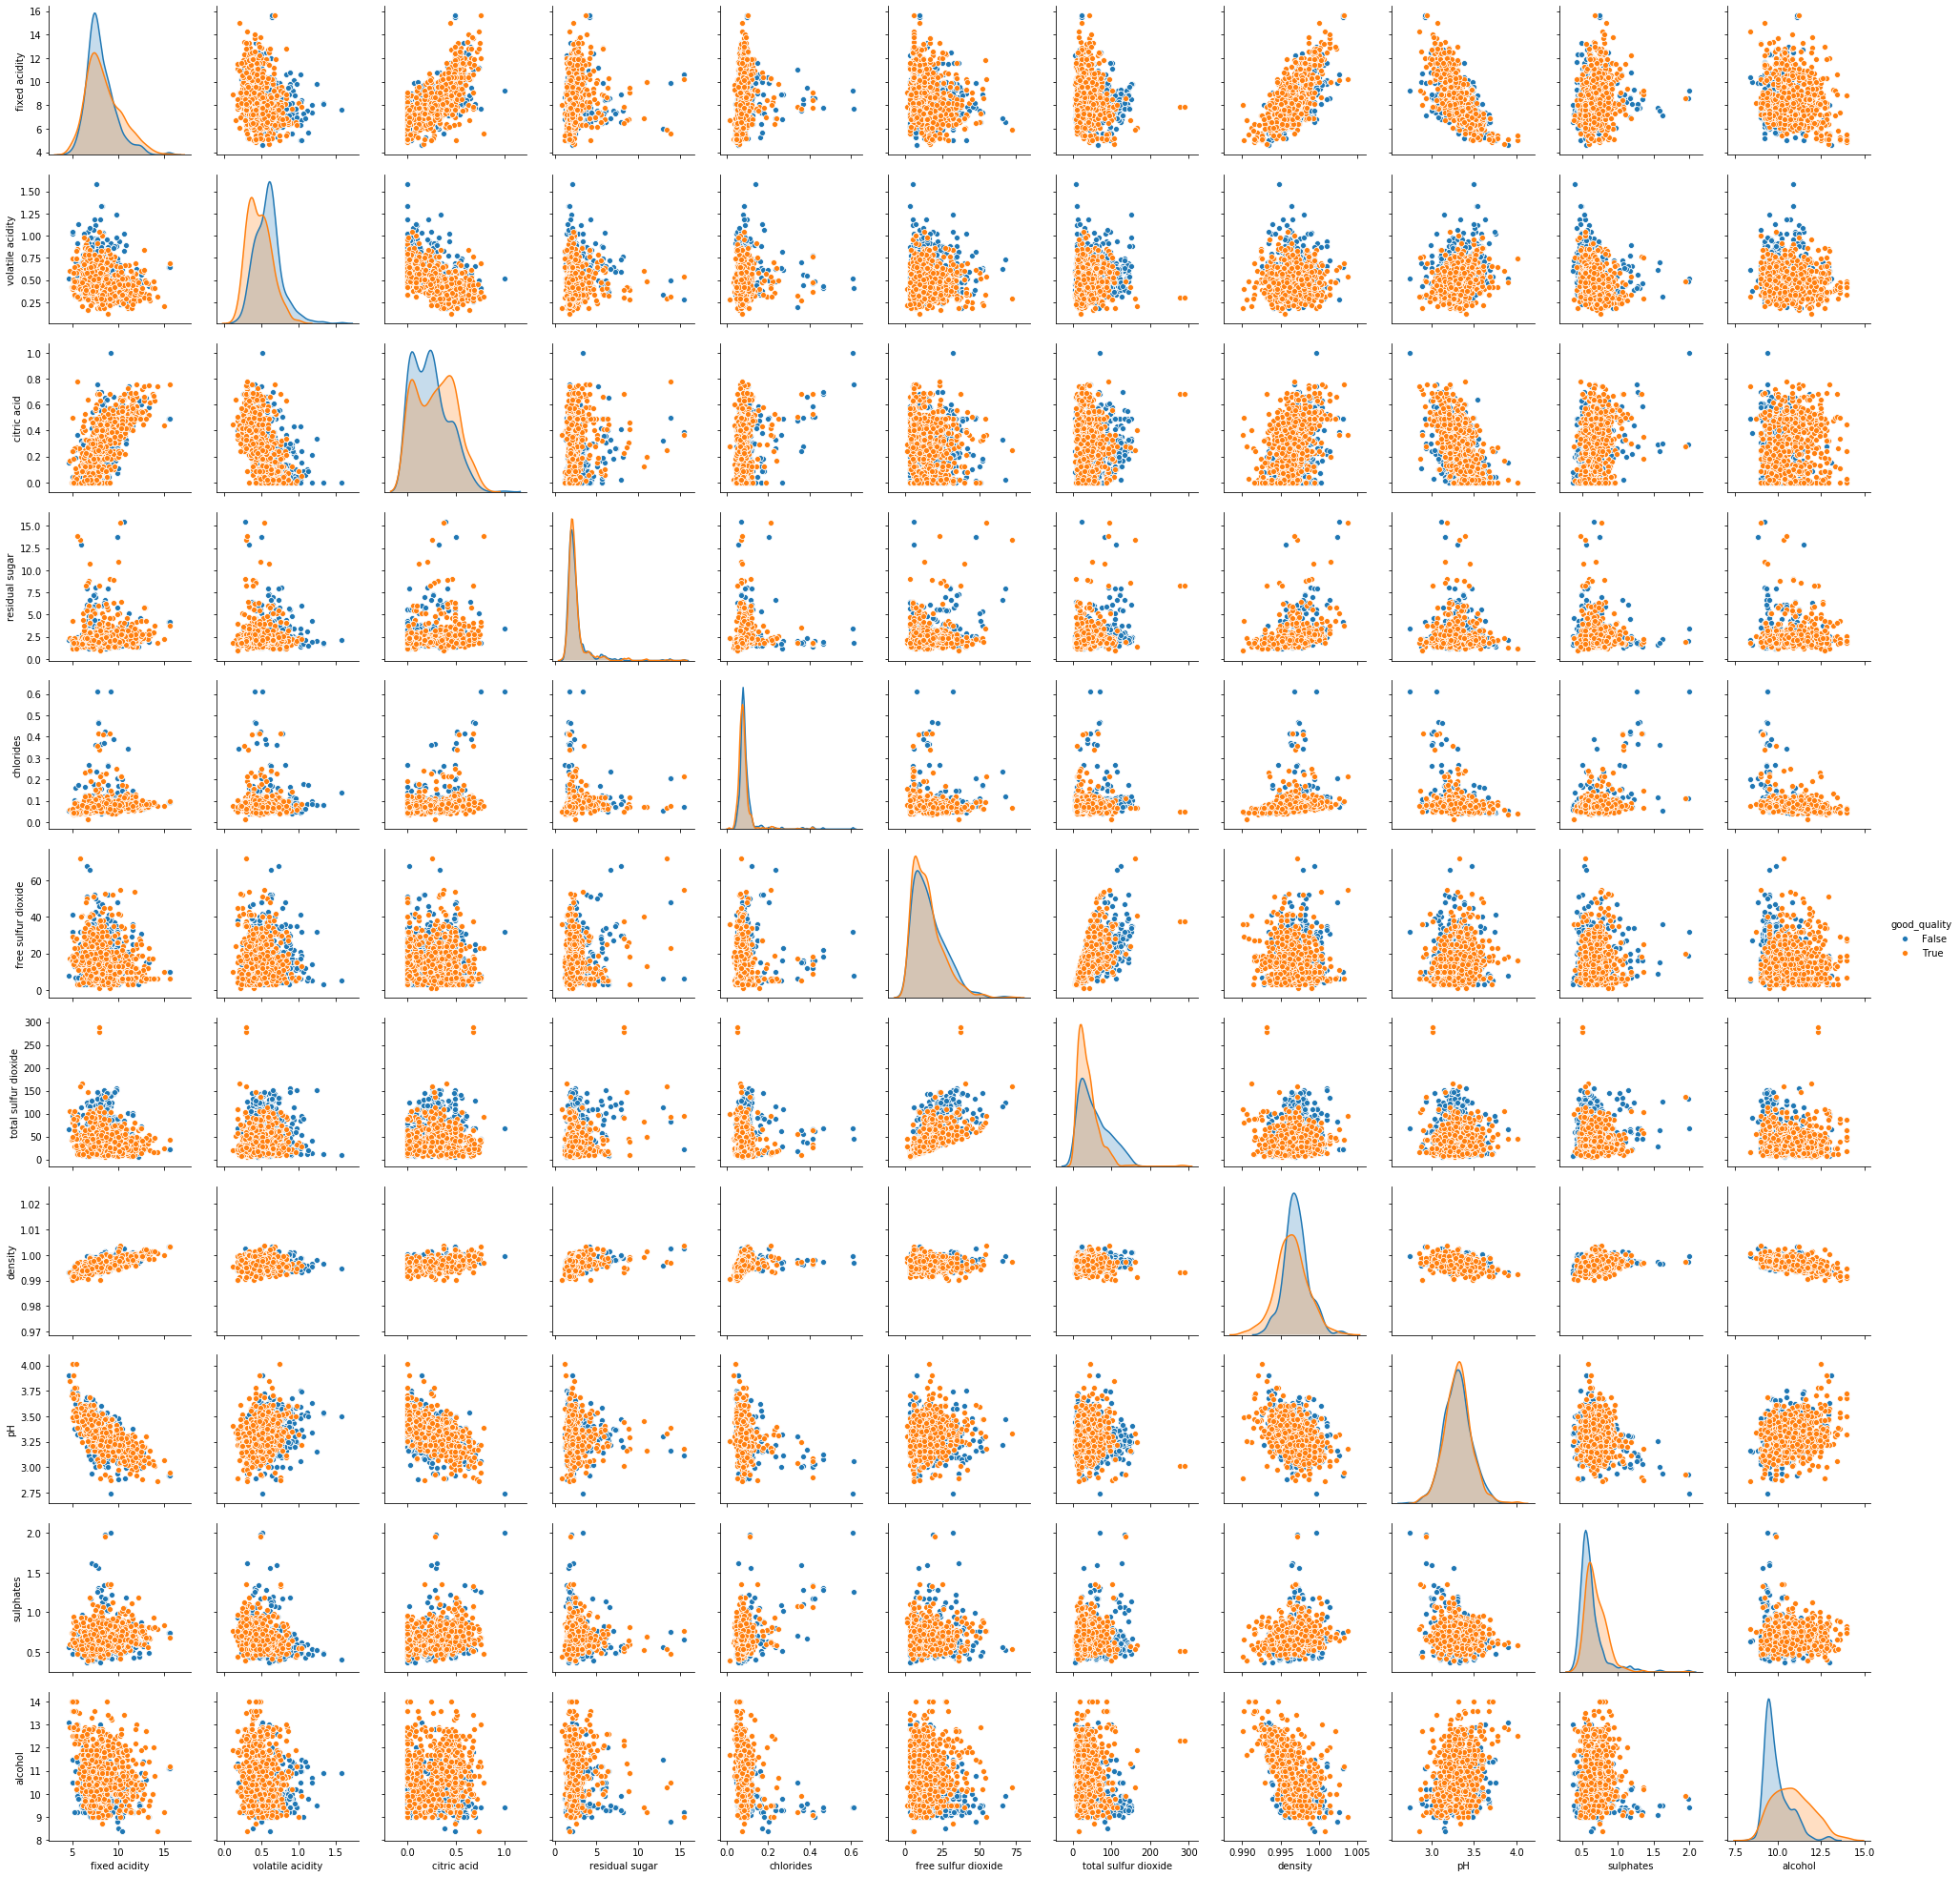

In [8]:
sns.pairplot(data, hue="good_quality", vars=variable_list)